In [19]:
from MLTSA_Lite.MLTSA_sk import (
    MLTSA as MLTSA_skl,
    MLTSA_Plot as MLTSA_plot_sk,
)
from MLTSA_Lite.OneD_pot_data import (
    potentials,
    dataset
)
from MLTSA_Lite.models import SKL_Train
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier
from LRP import *

In [20]:
total_n_pots = 25
n_DW = 5
relevant_DW_n = 2
pots = potentials(total_n_pots, n_DW, relevant_DW_n)
n_features = 180
degree_of_mixing = 2

oneD_dataset = dataset(pots, n_features, degree_of_mixing)
n_sims = 100
n_steps = 500
simple_data = pots.generate_data(n_sims, n_steps)
""" We have succesfully created test data for our MLTSA to analyze """
plt.plot(simple_data[0][:,pots.relevant_id,:].T, color="r", label="DW potential", alpha=0.1)
plt.plot(simple_data[0][:,-1,:].T, color="b", label="SW potential", alpha=0.1)
handles, labels = plt.gca().get_legend_handles_labels()
temp = {k:v for k,v in zip(labels, handles)}
plt.legend(temp.values(), temp.keys(), loc='best');
plt.xlabel("Simulation Steps")
plt.ylabel("Reaction Coordinate")
n_simulations = 100
n_steps = 500
data, ans = oneD_dataset.generate_linear(n_simulations, n_steps)
#We proceed to plot the values
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].plot(data[0,0,:], color="r", label="Sim 1, feature 1")
axs[1].plot(data[0,1,:], color="r", label="Sim 1, feature 2")
axs[0].plot(data[1,0,:], color="b", label="Sim 2, feature 1")
axs[1].plot(data[1,1,:], color="b", label="Sim 2, feature 2")
axs[0].legend()
axs[1].legend()
axs[1].set_xlabel("Simulation Steps")
axs[1].set_ylabel("Reaction Coordinate")
axs[0].set_xlabel("Simulation Steps")
axs[0].set_ylabel("Reaction Coordinate")
relevant_dists = np.concatenate((np.where(pots.relevant_id == np.array(oneD_dataset.combinations).T[1])[0],
                          np.where(pots.relevant_id == np.array(oneD_dataset.combinations).T[0])[0]))
print("Features combined with the relevant DW are:", list(relevant_dists))
for feat in relevant_dists:
    print("Feature", feat,"- Potentials involved:",list(oneD_dataset.combinations[feat]))
    summ = np.array(oneD_dataset.mixing_coefs).T[feat][1] + np.array(oneD_dataset.mixing_coefs).T[feat][0]
    print("Pot1:", np.around(100 *np.array(oneD_dataset.mixing_coefs).T[feat][0]/summ, decimals=2), "%")
    print("Pot2:", np.around(100 *np.array(oneD_dataset.mixing_coefs).T[feat][1]/summ, decimals=2), "%")
#We can choose which feature to plot here
feature_to_plot = 80
plt.figure(figsize=(5,7))
for dat, answer in zip(data[:,feature_to_plot,:], ans):
    if answer == "IN":
        plt.plot(list(reversed(dat)), np.arange(0, len(dat)), color="blue", alpha=0.1)
    elif answer == "OUT":
        plt.plot(list(reversed(dat)), np.arange(0, len(dat)), color="r", alpha=0.1)
plt.ylabel("time (steps)")
plt.xlabel(r'$\alpha y^{*} + (1-\alpha)y$')
time_frame = [30, 60]

X, Y = oneD_dataset.PrepareData(data, ans, time_frame, mode="Normal")

print("Shape of X is:", X.shape)
print("Shape of Y is:", Y.shape)
print("X and Y have the same length:", len(X) == len(Y))
#from MLTSA import mlp_sk as SKL_Train
from sklearn.neural_network import MLPClassifier
NN = MLPClassifier(random_state=1, verbose=False, max_iter=500) # You can set the verbose to false for less prints.

trained_NN, train_acc, test_acc = SKL_Train(NN, X, Y)
model_summary(NN)
""" Time for Validation with new simulations """

#Generate 25 additional simulations data
data_val, ans_val = oneD_dataset.generate_linear(25, 500)

#Prepare for trial
X_val, Y_val = oneD_dataset.PrepareData(data_val, ans_val, time_frame, mode="Normal")

#Predict the new simulations on the already trained NN
Y_pred = trained_NN.predict(X_val)
val_acc = Y_val == Y_pred
val_acc = np.mean(val_acc)

print("Validation Accuracy is", val_acc*100)
pred_raw = NN._forward_pass_fast(X_val)
pred_raw.shape
[coef.shape for coef in NN.coefs_]
NN.n_layers_
#from MLTSA import MLTSA_skl

#We Call the method on the data, labels and trained NN.
ADrop_train_avg = MLTSA_skl(data[:,:,time_frame[0]:time_frame[1]], ans, trained_NN, drop_mode="Average")

plt.figure(figsize=(10,4))
plt.plot(ADrop_train_avg*100, label="Training Accuracy Drop", color="C0")
plt.legend()
plt.xlabel("# Feature")
plt.ylabel("Accuracy (%)")
plt.ylim()
#from MLTSA import MLTSA_plot_sk

#We simply get the plot with this
MLTSA_plot_sk([ADrop_train_avg], oneD_dataset, pots, errorbar=False)
Y_pred_proba = trained_NN.predict_proba(X_val)
plt.figure(figsize=(16,4))
plt.plot(Y_pred_proba.T[0][:750], marker="o", lw=0)
plt.plot(Y_pred_proba.T[1][:750], marker="o", lw=0)
model_summary(trained_NN, True)

Defining Potentials: 100%|##########| 25/25 [00:00<00:00, 754.04it/s]


Generating dataset


Running Simulations:  82%|########2 | 82/100 [00:17<00:03,  4.72it/s]

Append hidden
Appedn output


100%|██████████| 180/180 [00:03<00:00, 49.80it/s]
/home/ucapzwe/.local/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ucapzwe/.local/lib/python3.8/site-packages/numpy/core/_methods.py:251: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/home/ucapzwe/LRP_build/MLTSA_Lite/MLTSA_sk.py:112: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(dat, "-o", color="black", marker="s")
/home/ucapzwe/.local/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ucapzwe/.local/lib/python3.8/site-packages/numpy/core/_methods.py:251: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(

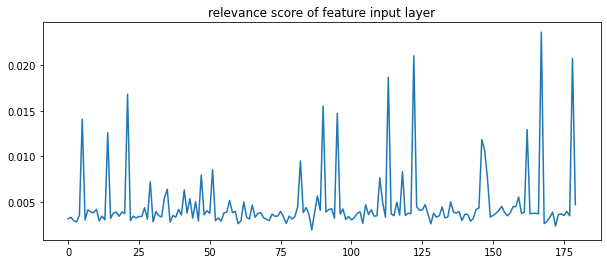

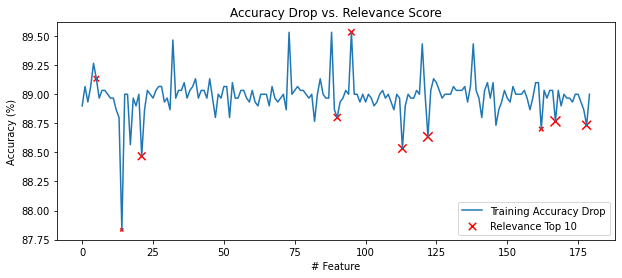

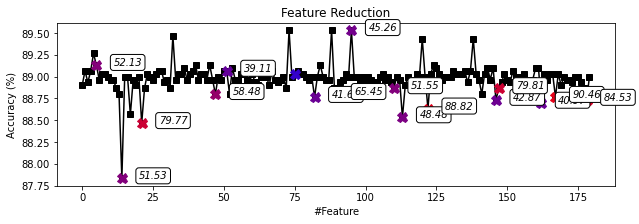

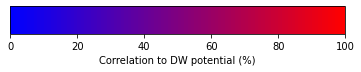

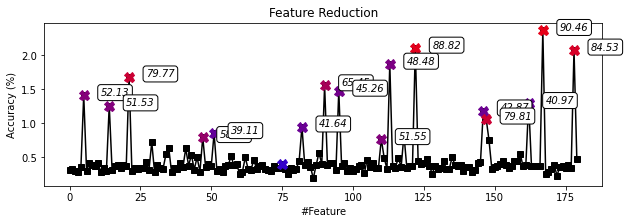

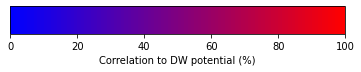

In [ ]:
# -- Data Processing -- #
# Calculate Relevance
relevance = LRP_eps_nb(trained_NN, X_val[1]) # X_val[0] could be changed to other inputs
# Number of top relevance score
num = 10
top_num_LRP = np.argsort(relevance[0])[-num:]

# -- Plottings -- #
# Plot of relevance score
plt.figure(figsize=(10,4))
plt.title("relevance score of feature input layer")
plt.plot(relevance[0])
# Plot of Accuracy Drop vs. Relevance Score
plt.figure(figsize=(10,4))
plt.plot(ADrop_train_avg*100, label="Training Accuracy Drop", color="C0")
plt.scatter(top_num_LRP, (ADrop_train_avg*100)[top_num_LRP], marker="x", color='r', label="Relevance Top {}".format(num), s=list(range(10,110,10)))
plt.legend()
plt.title("Accuracy Drop vs. Relevance Score")
plt.xlabel("# Feature")
plt.ylabel("Accuracy (%)")
# Plot of MLTSA accuracy drop vs. feature importance
MLTSA_plot_sk([ADrop_train_avg], oneD_dataset, pots, errorbar=False)
# Plot of Relevance Score vs. feature importance using API of MLTSA plot (title is not accurate)
MLTSA_plot_sk([relevance[0]], oneD_dataset, pots, errorbar=False)

(0.0018958405987506363, 0.033661823006784185)

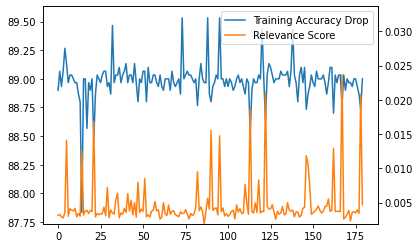

In [ ]:
from matplotlib import rc
rc('mathtext', default='regular')

fig = plt.figure()
ax = fig.add_subplot(111)
ln1 = ax.plot(range(len(ADrop_train_avg)), ADrop_train_avg*100, label="Training Accuracy Drop", color="C0")

ax2 = ax.twinx()
ln2 = ax2.plot(range(len(ADrop_train_avg)), relevance[0], label="Relevance Score", color="C1")

#ax.legend(loc='best')
#ax2.legend(loc='best')
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=1)

ax.set_ylim(min(ADrop_train_avg*100)-0.1,max(ADrop_train_avg*100)+0.1)
ax2.set_ylim(min(relevance[0]), max(relevance[0])+0.01)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ln1 = ax.plot(range(len(ADrop_train_avg)), ADrop_train_avg*100, label="Training Accuracy Drop", color="C0")

ax2 = ax.twinx()
ln2 = ax2.plot(range(len(ADrop_train_avg)), relevance[0], label="Relevance Score", color="C1")

#ax.legend(loc='best')
#ax2.legend(loc='best')
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=1)

ax.set_ylim(min(ADrop_train_avg*100)-0.1,max(ADrop_train_avg*100)+0.1)
ax2.set_ylim(min(relevance[0]), max(relevance[0])+0.01)